<h1>Réseaux de neurones convolutionnels (CNN)</h1>

<h2>Reconnaissance des panneaux de signalisation routière à l'aide de CNN et Keras en Python:</h2>

<p>À l'ère de l'intelligence artificielle, les êtres humains deviennent de plus en plus dépendants de la technologie. Avec la technologie améliorée, des multinationales telles que Google, Tesla, Uber, Ford, Audi, Toyota, Mercedes-Benz et bien d'autres travaillent sur l'automatisation des véhicules. Elles tentent de rendre les véhicules autonomes ou sans conducteur plus précis. Vous connaissez peut-être tous les voitures autonomes, où le véhicule lui-même se comporte comme un conducteur et n'a pas besoin de l'aide humaine pour circuler sur la route. Il n'est pas faux de penser aux aspects de sécurité, à un risque d'accidents majeurs provenant des machines. Mais aucune machine n'est plus précise que les humains. Les chercheurs utilisent de nombreux algorithmes pour garantir une sécurité routière et une précision à 100 %. Un tel algorithme est la Reconnaissance des Panneaux de Signalisation dont nous parlons dans ce blog.</p>

<h3>Dataset exploration</h3>

In [1]:
import numpy as np

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image 
import os 
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

C:\Users\21263\AppData\Local\Temp\ipykernel_5360\2494059279.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
import numpy as np
from PIL import Image 
import os 

data = []
labels = []
classes = 43 
cur_path = os.getcwd() 

for i in range(classes): 
    path = os.path.join(cur_path, 'train', str(i)) 
    images = os.listdir(path) 
    for a in images: 
        try: 
            image = Image.open(os.path.join(path, a)) 
            image = image.resize((30,30)) 
            image = np.array(image) 
            data.append(image) 
            labels.append(i) 
        except: 
            print("Error loading image") 

data = np.array(data)
labels = np.array(labels)


In [17]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


<h3>CNN model building</h3>

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

model = Sequential() 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_t1.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) 
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(rate=0.25)) 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(rate=0.25)) 
model.add(Flatten())
model.add(Dense(256, activation='relu')) 
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation du modèle 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


<h3>Model training and validation</h3>

In [19]:
eps = 15
anc = model.fit(X_t1, y_t1, batch_size=32, epochs=eps, validation_data=(X_t2, y_t2))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 84s 74ms/step - accuracy: 0.3171 - loss: 3.4531 - val_accuracy: 0.9411 - val_loss: 0.2936
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 67s 68ms/step - accuracy: 0.8375 - loss: 0.5866 - val_accuracy: 0.9648 - val_loss: 0.1253
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.9027 - loss: 0.3419 - val_accuracy: 0.9759 - val_loss: 0.0971
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 69s 70ms/step - accuracy: 0.9267 - loss: 0.2606 - val_accuracy: 0.9814 - val_loss: 0.0777
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 70s 71ms/step - accuracy: 0.9389 - loss: 0.2190 - val_accuracy: 0.9871 - val_loss: 0.0486
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 70s 72ms/step - accuracy: 0.9408 - loss: 0.2137 - val_accuracy: 0.9858 - val_loss: 0.0502
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 68s 69ms/step - accuracy: 0.9404 - loss: 0.2155 - val_accuracy: 0.9862 - val_loss: 0.0514
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 83s 70ms/step - accuracy: 0.9478 - loss: 0.2127 - 

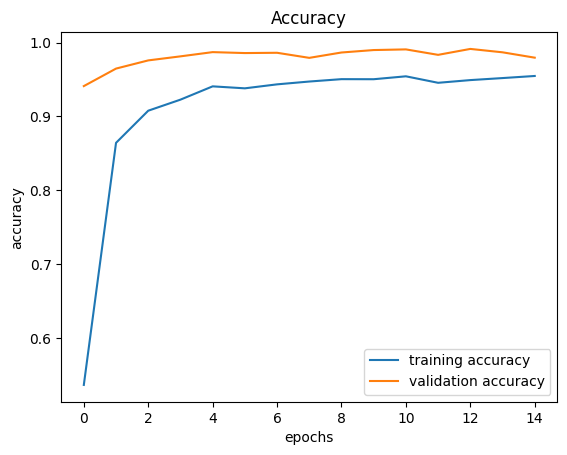

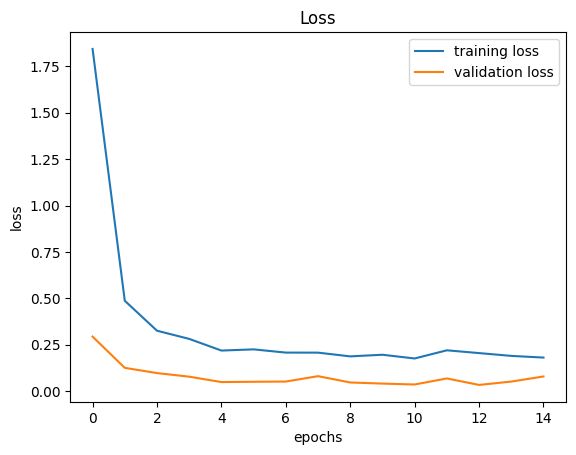

In [25]:

# Plotting graphs for accuracy
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Plotting graphs for loss
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


<h3>Model testing</h3>

In [28]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
   image = Image.open(img)
   image = image.resize((30,30))
   data.append(np.array(image))
X_test=np.array(data)
pred_probs = model.predict(X_test)
pred = np.argmax(pred_probs, axis=1)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

395/395 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step
0.9566904196357878


In [31]:
# Sauvegarde du modèle au format natif de Keras
model.save('traffic_classifier.keras')

<h2>GUI for Traffic Signs Classifier</h2>

In [1]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
# Load the trained model to classify sign
from keras.models import load_model

model = load_model('traffic_classifier.keras')

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
           2:'Speed limit (30km/h)',
           3:'Speed limit (50km/h)',
           4:'Speed limit (60km/h)',
           5:'Speed limit (70km/h)',
           6:'Speed limit (80km/h)',
           7:'End of speed limit (80km/h)',
           8:'Speed limit (100km/h)',
           9:'Speed limit (120km/h)',
           10:'No passing',
           11:'No passing veh over 3.5 tons',
           12:'Right-of-way at intersection',
           13:'Priority road',
           14:'Yield',
           15:'Stop',
           16:'No vehicles',
           17:'Veh > 3.5 tons prohibited',
           18:'No entry',
           19:'General caution',
           20:'Dangerous curve left',
           21:'Dangerous curve right',
           22:'Double curve',
           23:'Bumpy road',
           24:'Slippery road',
           25:'Road narrows on the right',
           26:'Road work',
           27:'Traffic signals',
           28:'Pedestrians',
           29:'Children crossing',
           30:'Bicycles crossing',
           31:'Beware of ice/snow',
           32:'Wild animals crossing',
           33:'End speed + passing limits',
           34:'Turn right ahead',
           35:'Turn left ahead',
           36:'Ahead only',
           37:'Go straight or right',
           38:'Go straight or left',
           39:'Keep right',
           40:'Keep left',
           41:'Roundabout mandatory',
           42:'End of no passing',
           43:'End no passing vehicle with a weight greater than 3.5 tons' }
# Initialise GUI
top = tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label = Label(top, background='#CDCDCD', font=('arial', 15, 'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30, 30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = numpy.argmax(model.predict([image]), axis=-1)[0]
    sign = classes[pred + 1]
    print(sign)
    label.configure(foreground='#011638', text=sign)

def show_classify_button(file_path):
    classify_b = Button(top, text="Classify Image", command=lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
    classify_b.place(relx=0.79, rely=0.46)

def upload_image():
    try:
        file_path = filedialog.askopenfilename()
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width() / 2.25), (top.winfo_height() / 2.25)))
        im = ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image = im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload = Button(top, text="Upload an image", command=upload_image, padx=10, pady=5)
upload.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
upload.pack(side=BOTTOM, pady=50)

sign_image.pack(side=BOTTOM, expand=True)
label.pack(side=BOTTOM, expand=True)

heading = Label(top, text="Check Traffic Sign", pady=20, font=('arial', 20, 'bold'))
heading.configure(background='#CDCDCD', foreground='#364156')
heading.pack()

top.mainloop()

C:\Users\21263\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
Speed limit (30km/h)
